<a href="https://colab.research.google.com/github/dphummel/AI/blob/main/Is_it_a_dog%3F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Make sure we've got the latest version of fastai:
!pip install -Uqq fastai

In [2]:
from fastai.vision.all import *
from fastai.vision.widgets import *  #Needed for ImageClassiferCleaner

In [3]:
path = untar_data(URLs.PETS)/'images'
print(path)

fns = get_image_files(path)
failed = verify_images(fns)
failed.map(Path.unlink)

/root/.fastai/data/oxford-iiit-pet/images


(#0) []

In [5]:
# The input to this function is a string - the name of the file.
def is_cat(x):
    if (x[0].isupper()):
        return "Cat"
    else:
        return "Dog"

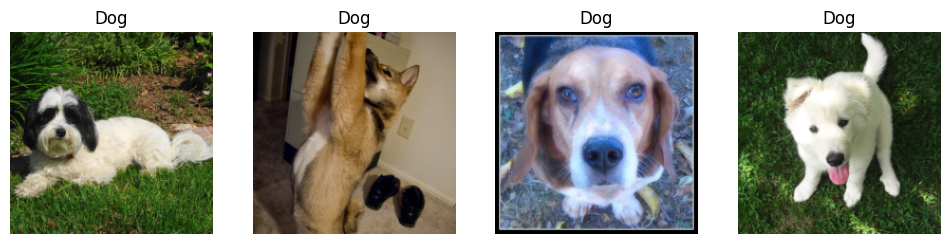

In [6]:
# Why is a string passed to is_cat function vs. a Path
dls = ImageDataLoaders.from_name_func('.',
    get_image_files(path), valid_pct=0.2, seed=42,
    label_func=is_cat,
    item_tfms=Resize(192))

dls.valid.show_batch(max_n=4, nrows=1)

In [7]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(3)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 128MB/s]


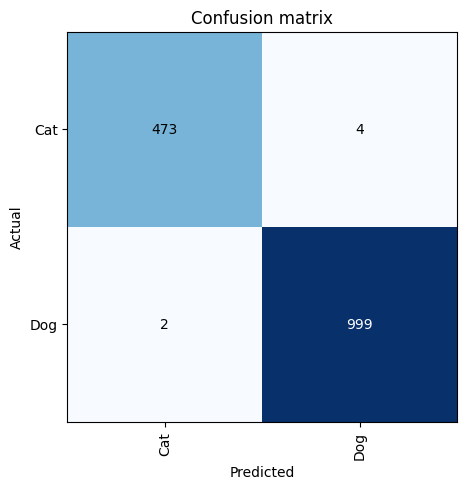

In [8]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()


In [10]:
cleaner = ImageClassifierCleaner(learn)
cleaner

In [11]:
print(cleaner.delete())
for idx in cleaner.delete():
    cleaner.fns[idx].unlink()

print(cleaner.change())
for idx,cat in cleaner.change():
    shutil.move(str(cleaner.fns[idx]), path/cat)

[1]
[]


In [12]:
dls = ImageDataLoaders.from_name_func('.',
    get_image_files(path), valid_pct=0.2, seed=42,
    label_func=is_cat,
    item_tfms=Resize(192))
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(3)

In [13]:
learn.export('model.pkl')

In [15]:
# Upload the model
path = Path()
print(path)
print(path.ls())
learn_inf = load_learner(path/"model.pkl")

.
[Path('.config'), Path('model.pkl'), Path('sample_data')]


Searching for 'cat photos'


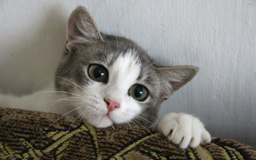

In [18]:
!pip install -Uqq fastai fastbook

from fastcore.all import *
from fastbook import search_images_ddg
from fastdownload import download_url
from fastai.vision.all import *

def search_images(term, max=30):
  print(f"Searching for '{term}'")
  # search_images_ddg comes from fastbook: https://github.com/fastai/fastbook/blob/master/utils.py#L45
  return search_images_ddg(term, max_images=max)

dest = 'cat.jpg'
urls = search_images('cat photos', max=1)
download_url(urls[0], dest, show_progress=False)
im = Image.open(dest)
im.to_thumb(256,256)

In [19]:
learn_inf.predict('cat.jpg')

('Cat', tensor(0), tensor([1.0000e+00, 3.4700e-11]))

In [20]:
btn_upload = widgets.FileUpload()
btn_upload

FileUpload(value={}, description='Upload')

In [21]:
img = PILImage.create(btn_upload.data[-1])
out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(img.to_thumb(128,128))
out_pl

Output()

In [22]:
pred,pred_idx,probs = learn_inf.predict(img)

In [23]:
lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
lbl_pred

Label(value='Prediction: Dog; Probability: 1.0000')

In [24]:
btn_run = widgets.Button(description='Classify')
btn_run

Button(description='Classify', style=ButtonStyle())

In [25]:
def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(128,128))
    pred,pred_idx,probs = learn_inf.predict(img)
    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

btn_run.on_click(on_click_classify)

In [26]:
btn_upload = widgets.FileUpload()

In [28]:
VBox([widgets.Label('Select your cat or dog!'),
      btn_upload, btn_run, out_pl, lbl_pred])